# 히스토그램, 구간화, 밀도

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

In [2]:
data = np.random.randn(1000)

(array([  4.,  23.,  51., 168., 256., 257., 168.,  55.,  14.,   4.]),
 array([-3.42292266, -2.73999362, -2.05706459, -1.37413555, -0.69120652,
        -0.00827748,  0.67465155,  1.35758058,  2.04050962,  2.72343865,
         3.40636769]),
 <a list of 10 Patch objects>)

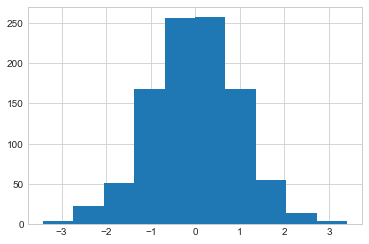

In [3]:
plt.hist(data)

(array([0.00878569, 0.        , 0.00878569, 0.01757137, 0.03514274,
        0.04832127, 0.0307499 , 0.07028549, 0.1229996 , 0.15814235,
        0.21964215, 0.36021312, 0.30749901, 0.36460597, 0.45246282,
        0.42610577, 0.40414155, 0.29871332, 0.30749901, 0.21524931,
        0.21524931, 0.0922497 , 0.10542823, 0.04392843, 0.02635706,
        0.02196421, 0.01317853, 0.00439284, 0.00878569, 0.00439284]),
 array([-3.42292266, -3.19527964, -2.96763663, -2.73999362, -2.51235061,
        -2.2847076 , -2.05706459, -1.82942158, -1.60177856, -1.37413555,
        -1.14649254, -0.91884953, -0.69120652, -0.46356351, -0.2359205 ,
        -0.00827748,  0.21936553,  0.44700854,  0.67465155,  0.90229456,
         1.12993757,  1.35758058,  1.5852236 ,  1.81286661,  2.04050962,
         2.26815263,  2.49579564,  2.72343865,  2.95108166,  3.17872468,
         3.40636769]),
 <a list of 1 Patch objects>)

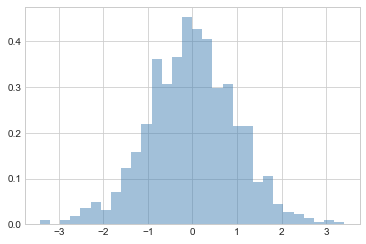

In [4]:
plt.hist(data, bins = 30, density = True, alpha = 0.5, histtype = 'stepfilled', color = 'steelblue', edgecolor = 'none')

(array([0.0063218 , 0.0031609 , 0.0094827 , 0.0094827 , 0.0126436 ,
        0.0094827 , 0.03476989, 0.03793079, 0.04109169, 0.06953978,
        0.06637888, 0.09166607, 0.11063146, 0.11695326, 0.13591866,
        0.14540135, 0.16752764, 0.16752764, 0.22758473, 0.22758473,
        0.20229753, 0.21178023, 0.16120585, 0.13591866, 0.12959686,
        0.14224045, 0.12011416, 0.09166607, 0.05057438, 0.06953978,
        0.04425259, 0.03476989, 0.03476989, 0.0126436 , 0.0126436 ,
        0.0063218 , 0.0031609 , 0.0031609 , 0.        , 0.0031609 ]),
 array([-3.25796979, -2.9416041 , -2.6252384 , -2.30887271, -1.99250701,
        -1.67614131, -1.35977562, -1.04340992, -0.72704422, -0.41067853,
        -0.09431283,  0.22205286,  0.53841856,  0.85478426,  1.17114995,
         1.48751565,  1.80388135,  2.12024704,  2.43661274,  2.75297844,
         3.06934413,  3.38570983,  3.70207552,  4.01844122,  4.33480692,
         4.65117261,  4.96753831,  5.28390401,  5.6002697 ,  5.9166354 ,
         6.23300

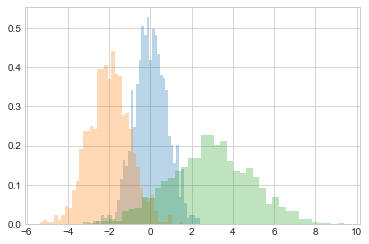

In [5]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype = 'stepfilled', alpha = 0.3, density = True, bins = 40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [6]:
counts, bin_edges = np.histogram(data, bins = 5)
print(counts)

[ 27 219 513 223  18]


## 2차원 히스토그램과 구간화

In [7]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

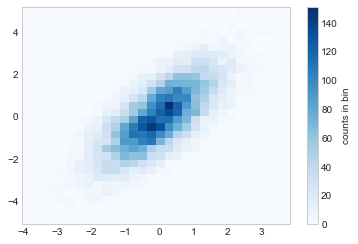

In [8]:
plt.hist2d(x, y, bins = 30, cmap = 'Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [9]:
counts, xedges, yedges = np.histogram2d(x, y, bins = 30)

### plt.hexbin : 육각형 구간화

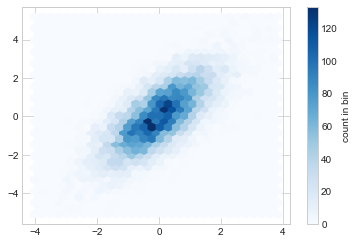

In [10]:
plt.hexbin(x, y, gridsize = 30, cmap = 'Blues')
cb = plt.colorbar(label = 'count in bin')

### 커널 밀도 추정

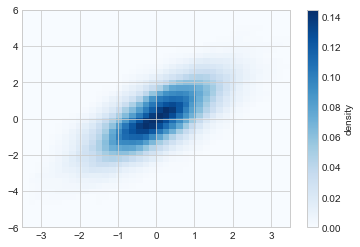

In [11]:
from scipy.stats import gaussian_kde

# 배열 크기 맞추기 [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 정규 그리드 평가
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 결과를 이미지로 그리기
plt.imshow(Z.reshape(Xgrid.shape), origin = 'lower', aspect = 'auto', extent = [-3.5, 3.5, -6, 6], cmap = 'Blues')
cb = plt.colorbar()
cb.set_label("density")